In [32]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

Constants

In [36]:
DATA_LOCATION='data/archive/genres/'
GENRES= ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

Functions:

In [4]:
def plot_wave(file_name, genre):
    plt.figure(figsize=(12,4))
    data,sample_rate = librosa.load(DATA_LOCATION + "/" + genre + "/"+ file_name + ".au")
    _ = librosa.display.waveplot(data,sr=sample_rate)
    
def plot_spectogram(file_name, genre):
    data,sample_rate = librosa.load(DATA_LOCATION + "/" + genre + "/"+ file_name + ".au")

    fig, ax = plt.subplots(figsize=(12, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=sample_rate, ax=ax)

# 1. Introduction

The aim of this exercise is to create a classification model based on music genre. For this purpose we use [GTZAN genre collection](http://marsyasweb.appspot.com/download/data_sets/) dataset. 

The dataset consists of the following 10 genres:

- Blues
- Classical
- Country
- Disco
- HipHop
- Jazz
- Metal
- Pop
- Reggae
- Rock

Each genre contains 100 songs.

# 2. Data Visualization

As a first step for analysing how is the data we have, we will plot the wave and the espectogram of one song of each genre:

**Blues**

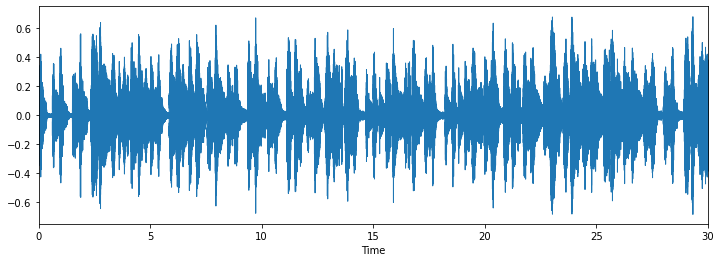

In [72]:
plot_wave('blues.00001', 'blues')

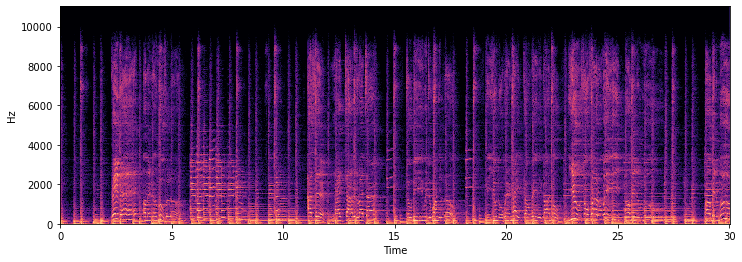

In [73]:
plot_spectogram('blues.00001', 'blues')

**Classical**

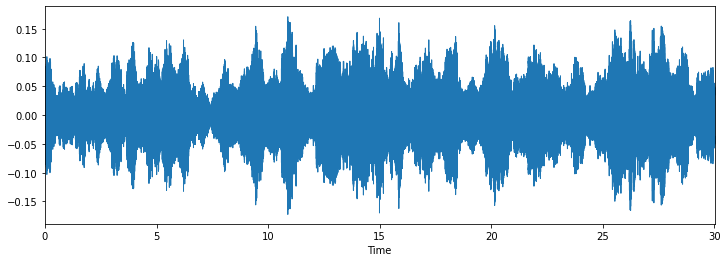

In [22]:
plot_wave('classical.00001', 'classical')

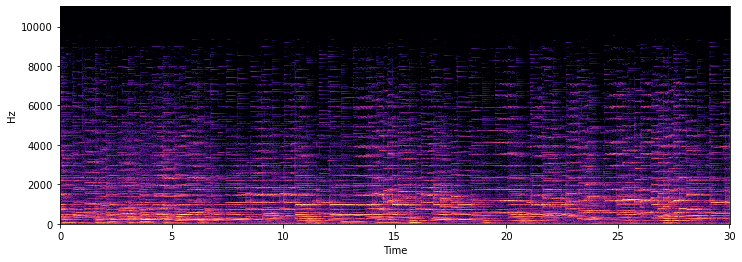

In [74]:
plot_spectogram('classical.00001', 'classical')

**Country**

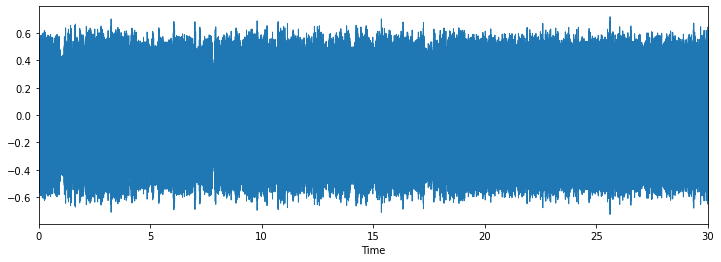

In [23]:
plot_wave('country.00001', 'country')

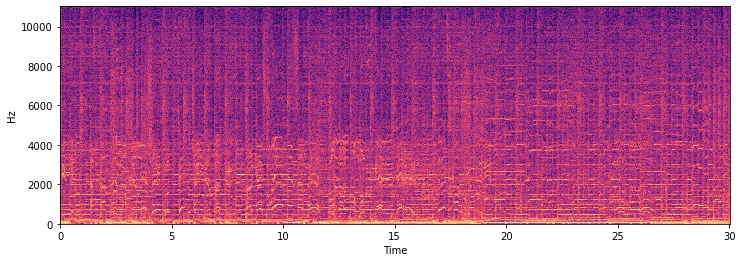

In [75]:
plot_spectogram('country.00001', 'country')

**Disco**

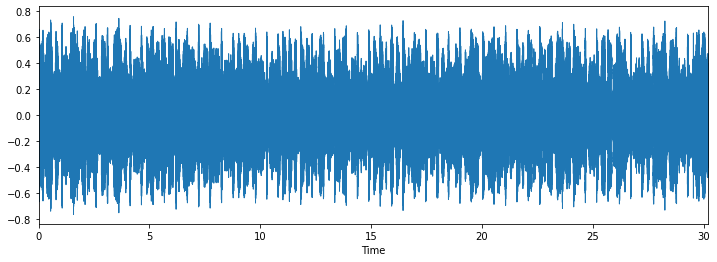

In [24]:
plot_wave('disco.00001', 'disco')

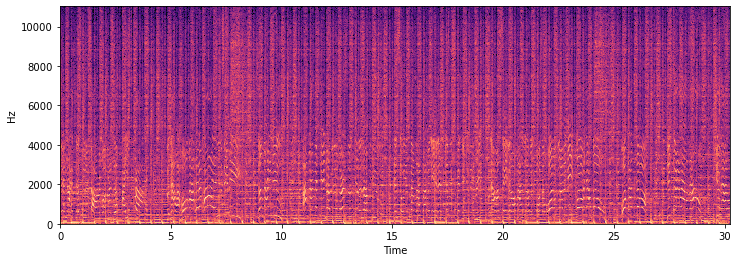

In [76]:
plot_spectogram('disco.00001', 'disco')

**Hiphop**

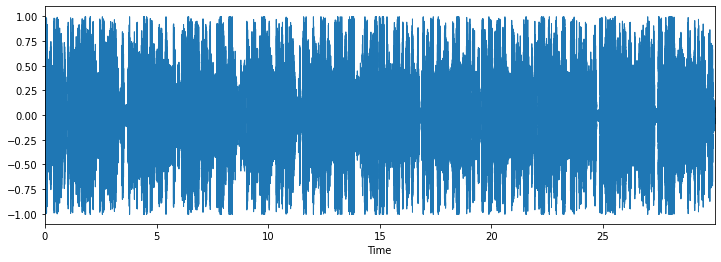

In [25]:
plot_wave('hiphop.00001', 'hiphop')

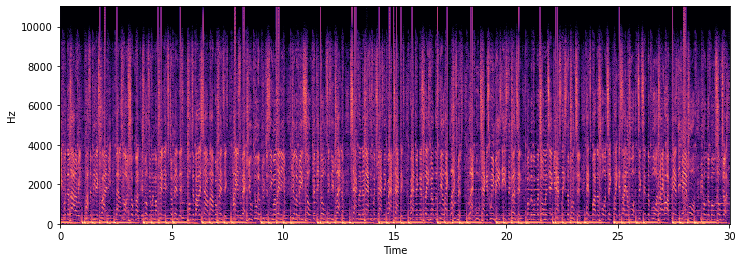

In [77]:
plot_spectogram('hiphop.00001', 'hiphop')

**Jazz**

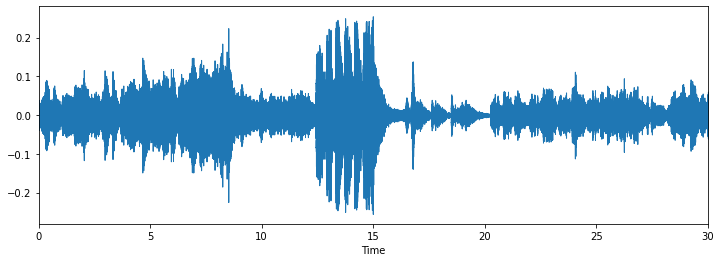

In [26]:
plot_wave('jazz.00001', 'jazz')

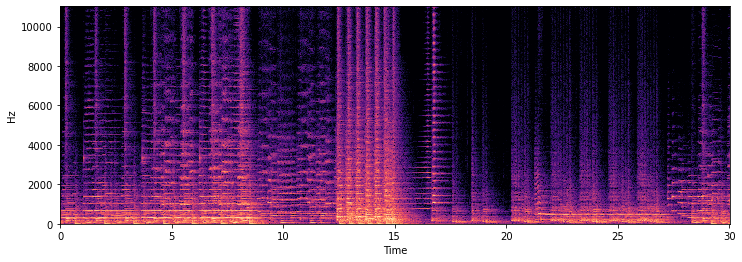

In [78]:
plot_spectogram('jazz.00001', 'jazz')

**Metal**

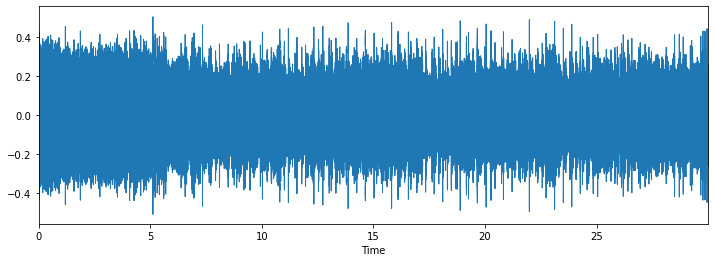

In [27]:
plot_wave('metal.00001', 'metal')

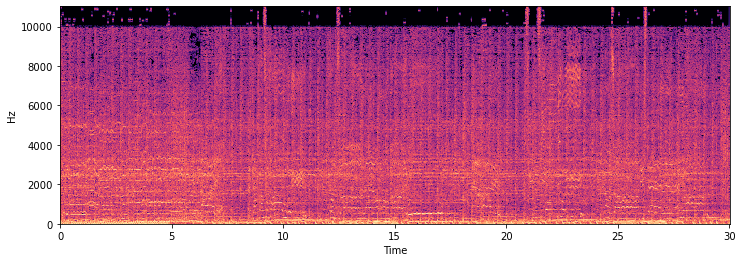

In [79]:
plot_spectogram('metal.00001', 'metal')

**Pop**

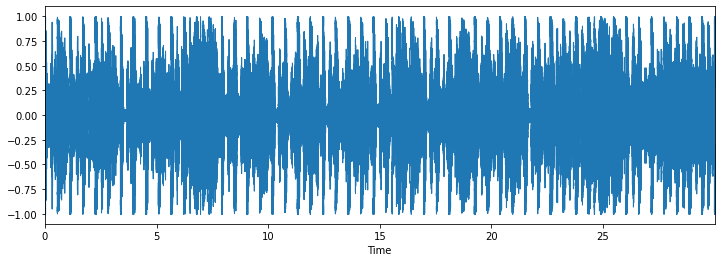

In [28]:
plot_wave('pop.00001', 'pop')

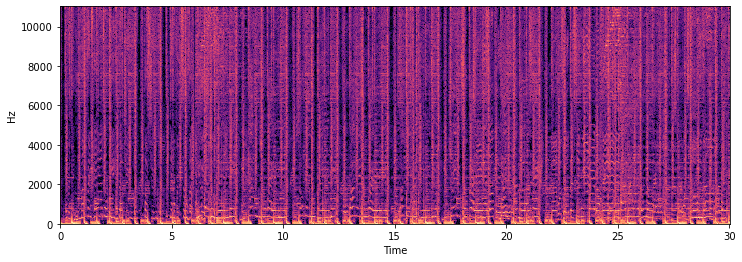

In [80]:
plot_spectogram('pop.00001', 'pop')

**Reggae**

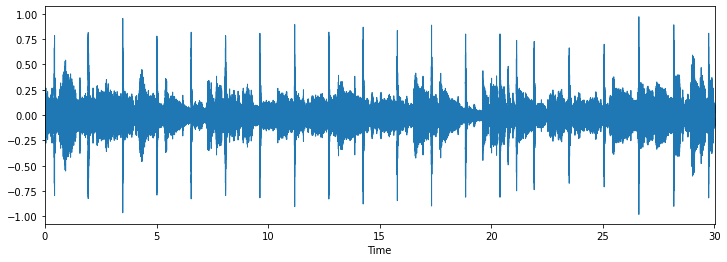

In [29]:
plot_wave('reggae.00001', 'reggae')

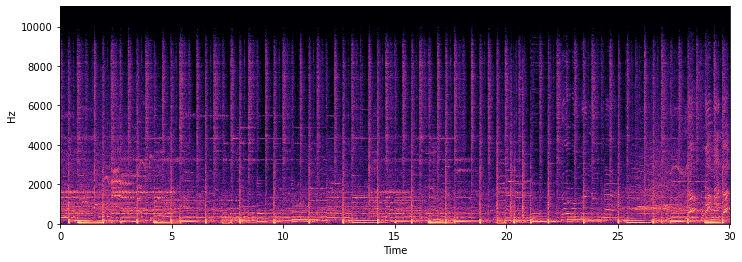

In [81]:
plot_spectogram('reggae.00001', 'reggae')

**Rock**

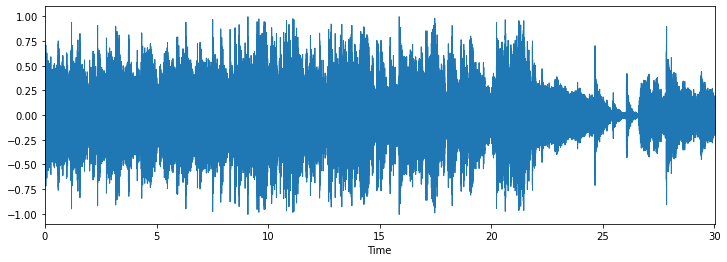

In [30]:
plot_wave('rock.00001', 'rock')

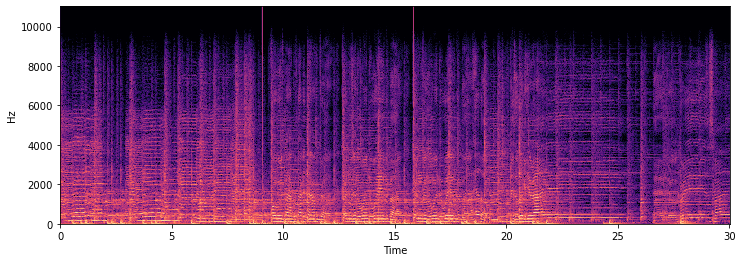

In [82]:
plot_spectogram('rock.00001', 'rock')

**Observations:**

In general each genre seems to have a particular wave shape. However, it seems that **pop** and **hip-hop** waves are quite simmilar.

### Audio sample file properties

Next we will iterate through each of the audio sample files and extract, number of audio channels, sample rate and bit-depth.

In [43]:
wavfilehelper = WavFileHelper()

audiodata = []
for genre in GENRES:
    for i in range(99):
        file_name = os.path.join(os.path.abspath(DATA_LOCATION), genre + '/', genre + '.' + str(i).rjust(5, '0') + '.au')
        data = wavfilehelper.read_file_properties(file_name)
        audiodata.append(data)

audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [46]:
audiodf.head(3)

num_channels  sample_rate  bit_depth
0           256   1702194274      11824
1           256   1702194274      11825
2           256   1702194274      11826

**Number of channels**

In [51]:
audiodf.num_channels.value_counts(normalize=True)

256    1.0
Name: num_channels, dtype: float64

**Sample rate**

In [50]:
audiodf.sample_rate.value_counts(normalize=True)

1397899597    0.293939
1702194274    0.100000
1935764579    0.091919
1853189987    0.089899
2054840682    0.082828
1801678706    0.067677
1752197480    0.058586
0             0.054545
1685217640    0.048485
1734829426    0.041414
1668508004    0.036364
1885956194    0.018182
1668248168    0.006061
2053204594    0.005051
1701273970    0.004040
1919903047    0.001010
Name: sample_rate, dtype: float64

The sample rate will go from 0 to 2054840682.

**Bit depth**

In [57]:
audiodf.bit_depth.value_counts(normalize=True).sort_index()

118      0.00404
283      0.00101
374      0.00303
630      0.00303
739      0.00101
          ...   
64630    0.00202
64886    0.00202
64995    0.00101
65142    0.00101
65398    0.00101
Name: bit_depth, Length: 167, dtype: float64

The bit depth goes from 118 to 65398.

**Observations:**

According to the audio properties results, we will need to normalize data for our model.

Finally, let's save the following constanst for the next notebook

In [58]:
%store DATA_LOCATION 
%store GENRES

Stored 'DATA_LOCATION' (str)
Stored 'GENRES' (list)
